# Setting up the notebook

In [3]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython.display import HTML
from numpy import sqrt, cos, sin, tan

# Plotting linear transformations on sets of points

In [4]:
# Creating a set of vectors arranged on a circle to vizualize

R = 1.0
N_POINTS = 60
theta = np.linspace(0, 2*np.pi, N_POINTS, endpoint=False)
V = np.array([(R*np.cos(i), R*np.sin(i)) for i in theta]).T
hsv = cm.get_cmap('hsv', N_POINTS)
colors = list(hsv(range(N_POINTS)))

In [5]:
theta

array([0.        , 0.10471976, 0.20943951, 0.31415927, 0.41887902,
       0.52359878, 0.62831853, 0.73303829, 0.83775804, 0.9424778 ,
       1.04719755, 1.15191731, 1.25663706, 1.36135682, 1.46607657,
       1.57079633, 1.67551608, 1.78023584, 1.88495559, 1.98967535,
       2.0943951 , 2.19911486, 2.30383461, 2.40855437, 2.51327412,
       2.61799388, 2.72271363, 2.82743339, 2.93215314, 3.0368729 ,
       3.14159265, 3.24631241, 3.35103216, 3.45575192, 3.56047167,
       3.66519143, 3.76991118, 3.87463094, 3.97935069, 4.08407045,
       4.1887902 , 4.29350996, 4.39822972, 4.50294947, 4.60766923,
       4.71238898, 4.81710874, 4.92182849, 5.02654825, 5.131268  ,
       5.23598776, 5.34070751, 5.44542727, 5.55014702, 5.65486678,
       5.75958653, 5.86430629, 5.96902604, 6.0737458 , 6.17846555])

In [6]:
V

array([[ 1.00000000e+00,  9.94521895e-01,  9.78147601e-01,
         9.51056516e-01,  9.13545458e-01,  8.66025404e-01,
         8.09016994e-01,  7.43144825e-01,  6.69130606e-01,
         5.87785252e-01,  5.00000000e-01,  4.06736643e-01,
         3.09016994e-01,  2.07911691e-01,  1.04528463e-01,
         6.12323400e-17, -1.04528463e-01, -2.07911691e-01,
        -3.09016994e-01, -4.06736643e-01, -5.00000000e-01,
        -5.87785252e-01, -6.69130606e-01, -7.43144825e-01,
        -8.09016994e-01, -8.66025404e-01, -9.13545458e-01,
        -9.51056516e-01, -9.78147601e-01, -9.94521895e-01,
        -1.00000000e+00, -9.94521895e-01, -9.78147601e-01,
        -9.51056516e-01, -9.13545458e-01, -8.66025404e-01,
        -8.09016994e-01, -7.43144825e-01, -6.69130606e-01,
        -5.87785252e-01, -5.00000000e-01, -4.06736643e-01,
        -3.09016994e-01, -2.07911691e-01, -1.04528463e-01,
        -1.83697020e-16,  1.04528463e-01,  2.07911691e-01,
         3.09016994e-01,  4.06736643e-01,  5.00000000e-0

In [178]:
def plot_points(ax, points, colors='blue', marker='o', size=10.0, alpha=1.0, zorder=0):
    if not isinstance(colors, list):
        colors = len(points[0]) * [colors]   
    out = ax.scatter(points[0,:], points[1,:], c=colors, marker=marker, s=size, alpha=alpha, zorder=zorder)
    return(out)

def plot_eigs(ax, M, zorder=3):
    w, v = np.linalg.eig(M)
    T = np.linspace(-100, 100, 10)
    v1 = v[:,0]
    v2 = v[:,1]
    
    X1 = v1[0]*T
    Y1 = v1[1]*T
    
    X2 = v2[0]*T
    Y2 = v2[1]*T
    
#     ax.plot(X1, Y1, color='k', zorder=zorder)
#     ax.scatter(v1[0], v1[1], marker='o', color='k', zorder=zorder)
#     ax.scatter(w[0]*v1[0], w[0]*v1[1], marker='x', color='k', zorder=zorder)
    ax.arrow(0, 0, w[0]*v1[0], w[0]*v1[1], width=.05, length_includes_head=True, color='k')
    ax.arrow(0, 0, v1[0], v1[1], width=.05, length_includes_head=True, color='.5')
        
#     ax.plot(X2, Y2, color='k', zorder=zorder)
#     ax.scatter(v2[0], v2[1], marker='o', color='k', zorder=zorder)
#     ax.scatter(w[1]*v2[0], w[1]*v2[1], marker='x', color='k', zorder=zorder)
    ax.arrow(0, 0, w[1]*v2[0], w[1]*v2[1], width=.05, length_includes_head=True, color='k')
    ax.arrow(0, 0, v2[0], v2[1], width=.05, length_includes_head=True, color='.5')
    pass

(-3, 3)

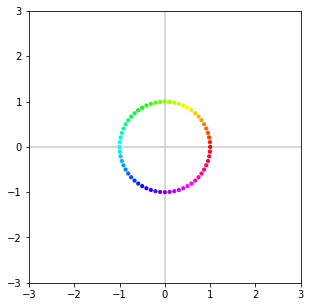

In [179]:
# Plotting the initial set of points V and V_sel

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.axhline(0, color='.8', zorder=0)
ax.axvline(0, color='.8', zorder=0)

# Plotting the points
a = plot_points(ax, V, colors=colors, zorder=1)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

In [206]:
# Definining the transformation
M = np.array(
    [[1, 0],
     [0, 1]]
    )

# Matrix multiplicaton (@) of points V and V_sel by M
V2 = M @ V

(-3, 3)

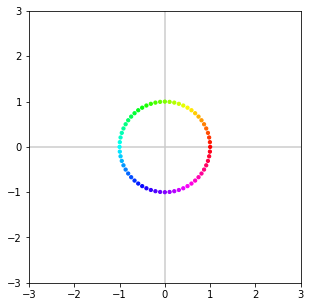

In [207]:
# Plotting the result of multiplying V and V_sel by M (along with the initial set)

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.axhline(0, color='.8', zorder=0)
ax.axvline(0, color='.8', zorder=0)

# Plotting the points
plot_points(ax, V, colors=colors, zorder=1, alpha=.2)

# Plotting the newpoints
plot_points(ax, V2, colors=colors, zorder=3)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])


(-3, 3)

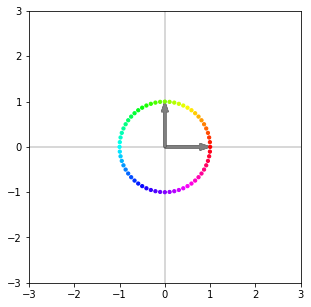

In [208]:
# Plotting the result of multiplying V and V_sel by M (along with the initial set)

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.axhline(0, color='.8', zorder=0)
ax.axvline(0, color='.8', zorder=0)

# Plotting the points
plot_points(ax, V, colors=colors, zorder=1, alpha=.2)

# Plotting the newpoints
plot_points(ax, V2, colors=colors, zorder=3)
plot_eigs(ax, M)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])


# Animating the flow

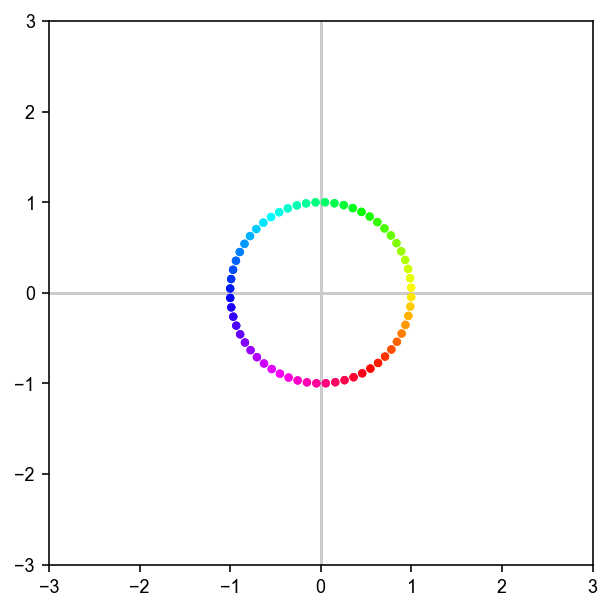

In [33]:
# Plotting the result of multiplying V by M as an animation

FRAMES = 100
INTERVAL = 20
DT = 0.0001

# Drawing the axes
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
ax.axhline(0, color='.8', zorder=0)
ax.axvline(0, color='.8', zorder=0)

# Setting the scale of x and y axis
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

V2 = V[:]

# Animating 
def init():
    a = plot_points(ax, V, colors=colors, zorder=1)
    return a

def animate(i):
    ax.clear()
    # Setting the scale of x and y axis
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_aspect('equal')
    ax.axhline(0, color='.8', zorder=0)
    ax.axvline(0, color='.8', zorder=0)
    
    V2 = V[:]
    for j in range(i): 
        V2 += DT * M @ V2
    a = plot_points(ax, V2, colors=colors, zorder=1)
    return a

anim = animation.FuncAnimation(fig, animate, frames=FRAMES, interval=INTERVAL, blit=False, init_func=init)

HTML(anim.to_html5_video())